In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def PDM(hipox,hipoy,stax,stay):
    x = (np.sin(np.deg2rad(hipox))-np.sin(np.deg2rad(stax)))**2
    y = (hipoy-stay)**2
    x = x*111.320
    y = y*110.574
    dist = np.round(np.sqrt(x+y),3)
    linex = [hipox,stax]
    liney = [hipoy,stay]
    line = [linex,liney]
    return dist,line

In [3]:
def PDMM(hipox,hipoy,stax,stay):
    x = (np.sin(np.deg2rad(hipox))-np.sin(np.deg2rad(stax)))**2
    y = (hipoy-stay)**2
    x = x*111.320
    dist = np.round(np.sqrt(x+y),3)
    linex = [hipox,stax]
    liney = [hipoy,stay]
    line = [linex,liney]
    return dist,line

In [4]:
data = pd.read_csv(r'Earthquake-Data.csv', sep=",")

In [5]:
data

,Mw,N
0,4.5,2945
1,4.6,2915
2,4.7,2550
3,4.8,2231
4,4.9,1950
5,5.0,1731
6,5.1,1564
7,5.2,1363
8,5.3,785
9,5.4,198


In [6]:
# Seismicity Rate Data 4.5
Longitude = [92.2,92.8,98.4,99.1,98.4]
Latitude = [2.9,1.9,0.3,1.7,3.2]
Rata = [0.004776,0.004474,0.006141,0.005465,0.004739]
Source = [98.149478,2.188076]
Mc = 4.5

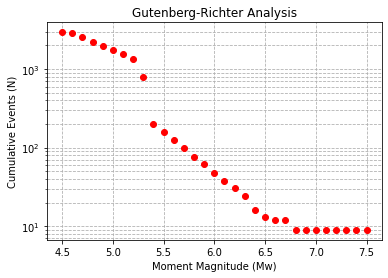

In [9]:
x = data.Mw.to_numpy()
y = data.N.to_numpy()

plt.plot(x,y, 'ro')
plt.title('Gutenberg-Richter Analysis')
plt.xlabel('Moment Magnitude (Mw)')
plt.ylabel('Cumulative Events (N)')
plt.yscale('log')
plt.grid(which='both', ls='--')
plt.savefig("Gutenberg-Richter Analysis")
plt.show()

# Least Squared Method Gutenberg-Richter Analysis

In [10]:
def r_2 (b, a, x, y):
    y_pred = b*x + a
    ss_total = ((y - y.mean())**2).sum()
    ss_residual = ((y - y_pred)**2).sum()
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

# Polynomial Difference

## 1. Analisis b-value untuk data Mw 4.5-6.5

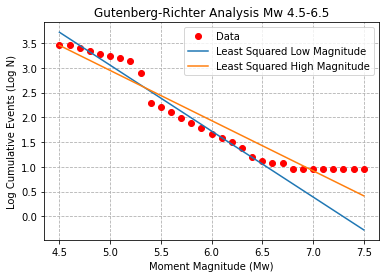

In [12]:
xdiv = x.copy()
ydiv = y.copy()

xbefore = xdiv[0:21]
xafter = xdiv
ybefore = ydiv[0:21]
yafter = ydiv

log_y = np.log10(ydiv)
log_y_before = np.log10(ybefore)
log_y_after = np.log10(yafter)

b_before, a_before = np.polyfit(xbefore, log_y_before, 1)
b_after, a_after = np.polyfit(xafter, log_y_after, 1)

y_before = np.polyval([b_before, a_before], xdiv)
y_after = np.polyval([b_after, a_after], xdiv)


plt.plot(xdiv,log_y, 'ro', label='Data')
plt.plot(xdiv, y_before,label='Least Squared Low Magnitude')
plt.plot(xdiv, y_after,label='Least Squared High Magnitude')

plt.title('Gutenberg-Richter Analysis Mw 4.5-6.5')
plt.xlabel('Moment Magnitude (Mw)')
plt.ylabel('Log Cumulative Events (Log N)')
plt.grid(which='both', ls='--')
plt.legend()
plt.savefig("Gutenberg-Richter Analysis Mw 4.5-6.5.jpg")
plt.show()

## 2. Analisis b-value untuk data Mw 6.5-4.5

In [13]:
xbefore

array([4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7,
       5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5])

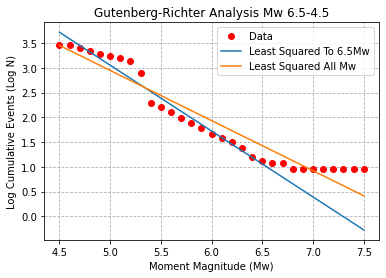

In [14]:
xdiv = x.copy()
ydiv = y.copy()

xbefore = xdiv[0:21]
xafter = xdiv
ybefore = ydiv[0:21]
yafter = ydiv

log_y = np.log10(ydiv)
log_y_before = np.log10(ybefore)
log_y_after = np.log10(yafter)

b_before_rev, a_before_rev = np.polyfit(np.flip(xbefore), np.flip(log_y_before), 1)
b_after_rev, a_after_rev = np.polyfit(np.flip(xafter), np.flip(log_y_after), 1)

y_before = np.polyval([b_before_rev, a_before_rev], xdiv)
y_after = np.polyval([b_after_rev, a_after_rev], xdiv)

plt.plot(np.flip(xdiv),np.flip(log_y), 'ro', label='Data')
plt.plot(np.flip(xdiv), np.flip(y_before) ,label='Least Squared To 6.5Mw')
plt.plot(np.flip(xdiv), np.flip(y_after) ,label='Least Squared All Mw')


plt.title('Gutenberg-Richter Analysis Mw 6.5-4.5')
plt.xlabel('Moment Magnitude (Mw)')
plt.ylabel('Log Cumulative Events (Log N)')
plt.grid(which='both', ls='--')
plt.savefig("Gutenberg-Richter Analysis Mw 6.5-4.5.jpg")
plt.legend()
plt.show()

## Perhitungan Nilai b-value average

In [15]:
avg_b_value__before = -(b_before+ b_before_rev)/2
print("======================================================\n")
print(" b-value Mw 4.5-6.5 =","{:.20f}".format(b_before))
print(" b-value (flipped) Mw 4.5-6.5 =","{:.20f}".format(b_before_rev))
print(" Average b-value Mw 4.5-6.5 =","{:.20f}".format(avg_b_value__before))
print(" Difference of b-value flipped and not flipped =","{:.20f}".format(abs(b_before-b_before_rev)))
print("\n======================================================")
avg_b_value__after = -(b_after+ b_after_rev)/2
print("======================================================\n")
print(" b-value Mw 4.5-8.6 =","{:.20f}".format(b_after))
print(" b-value (flipped) Mw 4.5-8.6 =","{:.20f}".format(b_after_rev))
print(" Average b-value Mw 4.5-8.6 =","{:.20f}".format(avg_b_value__after))
print(" Difference of b-value flipped and not flipped =","{:.20f}".format(abs(b_after-b_after_rev)))
print("\n======================================================")


 b-value Mw 4.5-6.5 = -1.33209343213021802477
 b-value (flipped) Mw 4.5-6.5 = -1.33209343213021536023
 Average b-value Mw 4.5-6.5 = 1.33209343213021669250
 Difference of b-value flipped and not flipped = 0.00000000000000266454


 b-value Mw 4.5-8.6 = -1.01396461483350330823
 b-value (flipped) Mw 4.5-8.6 = -1.01396461483350286414
 Average b-value Mw 4.5-8.6 = 1.01396461483350308619
 Difference of b-value flipped and not flipped = 0.00000000000000044409



# Calculate N

## Data

In [16]:
# Seismicity Rate Data 4.5
Longitude = [91.4,93.4,94.1,92.6,94.5]
Latitude = [2.8,3.8,3.1,0.5,2.0]
Rate = [0.000651,0.000659,0.000794,0.000271,0.001287]
Source = [93.051567,2.374612]
Mc = 4.5
dM = 0.2
X = np.arange(6,8.2+dM,dM)

In [17]:
#Mw 4.5-6.5
Nbefore = []
Nafter = []

for i in range(len(Rate)):
    val = []
    for j in range(len(X)):
        down = 10**(avg_b_value__before*(X[j]-Mc))
        val.append(Rate[i]*50/down)
    Nbefore.append(val)
    
for i in range(len(Rate)):
    val = []
    for j in range(len(X)):
        down = 10**(avg_b_value__after*(X[j]-Mc))
        val.append(Rate[i]*50/down)
    Nafter.append(val)

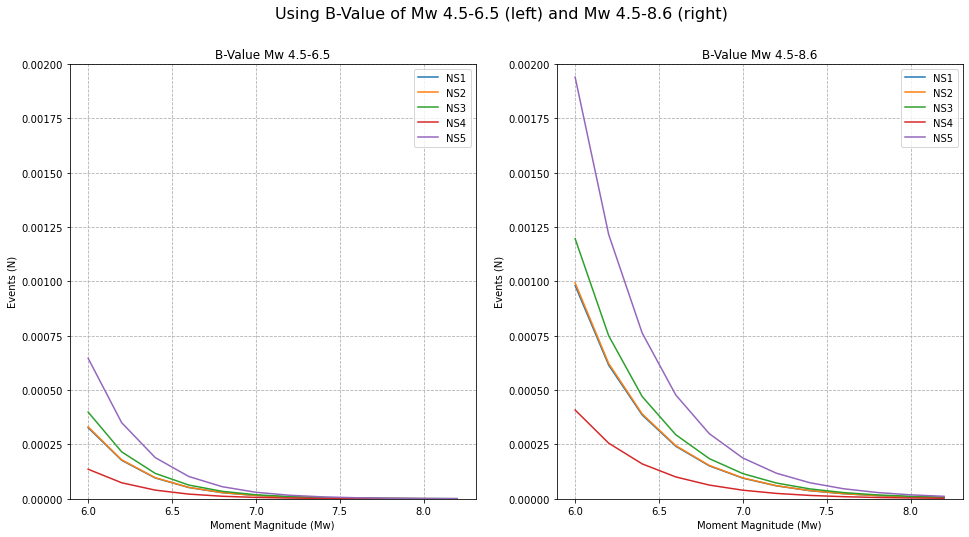

In [20]:
fig, axs = plt.subplots(1,2,figsize=(16,8))
fig.suptitle("Using B-Value of Mw 4.5-6.5 (left) and Mw 4.5-8.6 (right)", fontsize=16)

axs[0].plot(X, Nbefore[0],label='NS1')
axs[0].plot(X, Nbefore[1],label='NS2')
axs[0].plot(X, Nbefore[2],label='NS3')
axs[0].plot(X, Nbefore[3],label='NS4')
axs[0].plot(X, Nbefore[4],label='NS5')
axs[0].title.set_text('B-Value Mw 4.5-6.5')
axs[0].set_ylim([0,0.002])
axs[0].set_xlabel('Moment Magnitude (Mw)')
axs[0].set_ylabel('Events (N)')
axs[0].grid(which='both', ls='--')
axs[0].legend()

axs[1].plot(X, Nafter[0],label='NS1')
axs[1].plot(X, Nafter[1],label='NS2')
axs[1].plot(X, Nafter[2],label='NS3')
axs[1].plot(X, Nafter[3],label='NS4')
axs[1].plot(X, Nafter[4],label='NS5')
axs[1].title.set_text('B-Value Mw 4.5-8.6')
axs[1].set_ylim([0,0.002])
axs[1].set_xlabel('Moment Magnitude (Mw)')
axs[1].set_ylabel('Events (N)')
axs[1].grid(which='both', ls='--')
axs[1].legend()

plt.savefig("Using B-Value of Mw 4.5-6.5 (left) and Mw 4.5-8.6 (right).jpg")
plt.show()

# Calculate P

In [21]:
Pbefore = []
Pafter = []

for i in range(len(Rate)):
    val = []
    for j in range(len(X)):
        prob = 1-np.exp((-1)*Nbefore[i][j])
        val.append(prob)
    Pbefore.append(val)
    
for i in range(len(Rate)):
    val = []
    for j in range(len(X)):
        prob = 1-np.exp((-1)*Nafter[i][j])
        val.append(prob)
    Pafter.append(val)

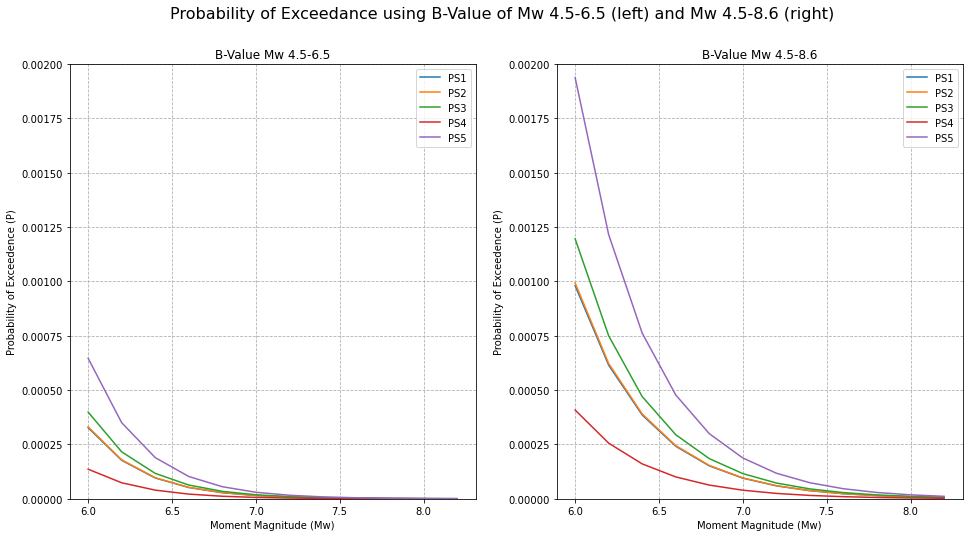

In [29]:
fig, axs = plt.subplots(1,2,figsize=(16,8))
fig.suptitle("Probability of Exceedance using B-Value of Mw 4.5-6.5 (left) and Mw 4.5-8.6 (right)", fontsize=16)

axs[0].plot(X, Pbefore[0],label='PS1')
axs[0].plot(X, Pbefore[1],label='PS2')
axs[0].plot(X, Pbefore[2],label='PS3')
axs[0].plot(X, Pbefore[3],label='PS4')
axs[0].plot(X, Pbefore[4],label='PS5')
axs[0].title.set_text('B-Value Mw 4.5-6.5')
axs[0].set_ylim([0,0.002])
axs[0].set_xlabel('Moment Magnitude (Mw)')
axs[0].set_ylabel('Probability of Exceedence (P)')
axs[0].grid(which='both', ls='--')
axs[0].legend()

axs[1].plot(X, Pafter[0],label='PS1')
axs[1].plot(X, Pafter[1],label='PS2')
axs[1].plot(X, Pafter[2],label='PS3')
axs[1].plot(X, Pafter[3],label='PS4')
axs[1].plot(X, Pafter[4],label='PS5')
axs[1].title.set_text('B-Value Mw 4.5-8.6')
axs[1].set_ylim([0,0.002])
axs[1].set_xlabel('Moment Magnitude (Mw)')
axs[1].set_ylabel('Probability of Exceedence (P)')
axs[1].grid(which='both', ls='--')
axs[1].legend()

plt.savefig("Using B-Value of Mw 4.5-6.5 (left) and Mw 4.5-8.6 (right) Probability of Exceedance.jpg")
plt.show()

# Calculate R

In [24]:
r = []
for i in range(len(Longitude)):
    value,line = PDM(Source[0],Source[1],Latitude[i],Longitude[i])
    valr,line = PDMM(Source[0],Source[1],Latitude[i],25)
    r.append(valr)

# Calculate PGA

In [25]:
PGA1 = []

for i in range(len(Rate)):
    val = []
    for j in range(len(X)):
        logvalue = 0.475*X[j]-np.log10(r[i]+(0.032*(10**0.475)))-0.001*r[i]-0.106
        temp = (10**logvalue)/980.665
        val.append(temp)
    PGA1.append(val)  

# Create PGA Plot

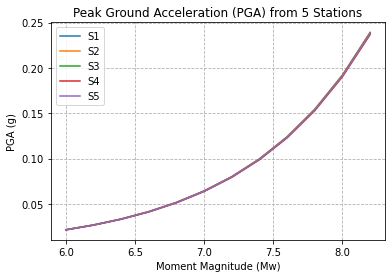

In [26]:
plt.plot(X, PGA1[0],label='S1')
plt.plot(X, PGA1[1],label='S2')
plt.plot(X, PGA1[2],label='S3')
plt.plot(X, PGA1[3],label='S4')
plt.plot(X, PGA1[4],label='S5')
plt.title("Peak Ground Acceleration (PGA) from 5 Stations")
plt.xlabel('Moment Magnitude (Mw)')
plt.ylabel('PGA (g)')
plt.grid(which='both', ls='--')
plt.legend()
plt.savefig("Peak Ground Acceleration (PGA) from 5 Stations.jpg")
plt.show()

# Create SHF Plot

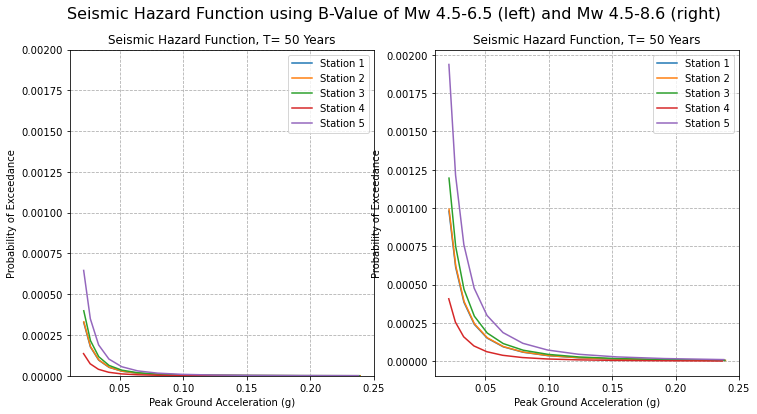

In [28]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
fig.suptitle("Seismic Hazard Function using B-Value of Mw 4.5-6.5 (left) and Mw 4.5-8.6 (right)", fontsize=16)

axs[0].plot(PGA1[0], Pbefore[0],label='Station 1')
axs[0].plot(PGA1[1], Pbefore[1],label='Station 2')
axs[0].plot(PGA1[2], Pbefore[2],label='Station 3')
axs[0].plot(PGA1[3], Pbefore[3],label='Station 4')
axs[0].plot(PGA1[4], Pbefore[4],label='Station 5')
axs[0].title.set_text('Seismic Hazard Function, T= 50 Years')
axs[0].set_ylim([0,0.002])
axs[0].set_xlabel('Peak Ground Acceleration (g)')
axs[0].set_ylabel('Probability of Exceedance')
axs[0].grid(which='both', ls='--')
axs[0].legend()

axs[1].plot(PGA1[0], Pafter[0],label='Station 1')
axs[1].plot(PGA1[1], Pafter[1],label='Station 2')
axs[1].plot(PGA1[2], Pafter[2],label='Station 3')
axs[1].plot(PGA1[3], Pafter[3],label='Station 4')
axs[1].plot(PGA1[4], Pafter[4],label='Station 5')
axs[1].title.set_text('Seismic Hazard Function, T= 50 Years')
axs[0].set_ylim([0,0.002])
axs[1].set_xlabel('Peak Ground Acceleration (g)')
axs[1].set_ylabel('Probability of Exceedance')
axs[1].grid(which='both', ls='--')
axs[1].legend()

plt.savefig("Using B-Value of Mw 4.5-6.5 (left) and Mw 4.5-8.6 (right) Seismic Hazard Function.jpg")
plt.show()

# Create PSHA

In [30]:
Ptotalbefore = []
Ptotalafter = []

for i in range(len(Pbefore[0])):
    temp = 1
    val = []
    for j in range(len(Rate)):
        value = 1-Pbefore[j][i]
        temp = temp*value
    Ptotalbefore.append((1-temp))

for i in range(len(Pafter[0])):
    temp = 1
    val = []
    for j in range(len(Rate)):
        value = 1-Pafter[j][i]
        temp = temp*value
    Ptotalafter.append((1-temp))
    

In [31]:
PGAtotalbefore = []
PGAtotalafter = []

for i in range(len(PGA1[0])):
    val = 0
    for j in range(len(Rata)):
        sumpga =np.array(PGA1[j]).sum()
        temp = (PGA1[j][i]/sumpga)*PGA1[j][i]
        val = val+temp
    PGAtotalbefore.append(val)
    PGAtotalafter.append(val)

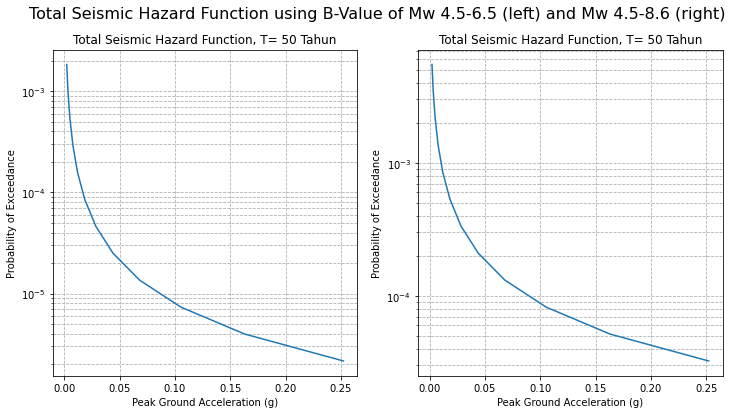

In [34]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
fig.suptitle("Total Seismic Hazard Function using B-Value of Mw 4.5-6.5 (left) and Mw 4.5-8.6 (right)", fontsize=16)

axs[0].plot(PGAtotalbefore,Ptotalbefore)
axs[0].title.set_text('Total Seismic Hazard Function, T= 50 Tahun')
axs[0].set_xlabel('Peak Ground Acceleration (g)')
axs[0].set_ylabel('Probability of Exceedance')
axs[0].grid(which='both', ls='--')
axs[0].set_yscale('log')

axs[1].plot(PGAtotalafter,Ptotalafter)
axs[1].title.set_text('Total Seismic Hazard Function, T= 50 Tahun')
axs[1].set_xlabel('Peak Ground Acceleration (g)')
axs[1].set_ylabel('Probability of Exceedance')
axs[1].grid(which='both', ls='--')
axs[1].set_yscale('log')

plt.savefig("Total Seismic Hazard Function using B-Value of Mw 4.5-6.5 (left) and Mw 4.5-8.6 (right).jpg")
plt.show()

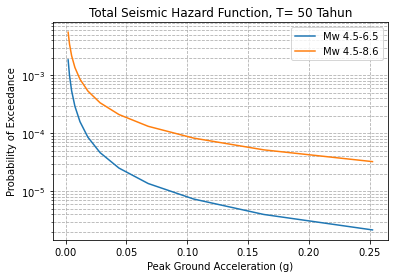

In [35]:
plt.plot(PGAtotalbefore,Ptotalbefore,label='Mw 4.5-6.5')
plt.plot(PGAtotalafter,Ptotalafter,label='Mw 4.5-8.6')
plt.title('Total Seismic Hazard Function, T= 50 Tahun')
plt.xlabel('Peak Ground Acceleration (g)')
plt.ylabel('Probability of Exceedance')
plt.grid(which='both', ls='--')
plt.legend()
plt.savefig("Total Seismic Hazard Function, T= 50 Tahun.jpg")
plt.yscale('log')